# Simulation Project
- Negin Mashayekhi 98243054
- Parsa Noori 98243067

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import random

## Request 1

In [30]:
# Function to calculate algebraic connectivity
def calculate_algebraic_connectivity(graph):
    laplacian_matrix = nx.laplacian_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(laplacian_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)
    algebraic_connectivity = sorted_eigenvalues[1]  # Smallest non-zero eigenvalue
    return algebraic_connectivity

# Function to calculate spectral gap
def calculate_spectral_gap(graph):
    adjacency_matrix = nx.adjacency_matrix(graph).toarray()
    eigenvalues = np.linalg.eigvals(adjacency_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)
    spectral_gap = sorted_eigenvalues[-1] - sorted_eigenvalues[-2]  # Difference between largest and second largest eigenvalues
    return spectral_gap
    
# Function to calculate natural connectivity
def calculate_natural_connectivity(graph):
    eigenvalues = nx.linalg.spectrum.normalized_laplacian_spectrum(graph)
    natural_connectivity = sum([abs(e) for e in eigenvalues])
    return natural_connectivity

# Function to calculate energy and Laplacian energy
def calculate_energy(graph):
    eigenvalues = nx.linalg.spectrum.laplacian_spectrum(graph)
    energy = sum([abs(e) for e in eigenvalues])
    laplacian_energy = sum([e**2 for e in eigenvalues])
    return energy, laplacian_energy

# Generate and analyze ER graph
p = 0.5  # Probability of edge existence
er_graph = nx.erdos_renyi_graph(1000, p)
er_natural_connectivity = calculate_natural_connectivity(er_graph)
er_energy, er_laplacian_energy = calculate_energy(er_graph)
er_algebraic_connectivity = calculate_algebraic_connectivity(er_graph)
er_spectral_gap = calculate_spectral_gap(er_graph)

# Generate and analyze Scale-free graph using Barabasi-Albert model
m0 = 3  # Initial number of nodes
sf_graph = nx.barabasi_albert_graph(1000, m0)
sf_natural_connectivity = calculate_natural_connectivity(sf_graph)
sf_energy, sf_laplacian_energy = calculate_energy(sf_graph)
sf_algebraic_connectivity = calculate_algebraic_connectivity(sf_graph)
sf_spectral_gap = calculate_spectral_gap(sf_graph)

# Generate and analyze Watts-Strogatz small-world graph
p_rewire = 0.3  # Probability of rewiring
ws_graph = nx.watts_strogatz_graph(1000, 4, p_rewire)
ws_natural_connectivity = calculate_natural_connectivity(ws_graph)
ws_energy, ws_laplacian_energy = calculate_energy(ws_graph)
ws_algebraic_connectivity = calculate_algebraic_connectivity(ws_graph)
ws_spectral_gap = calculate_spectral_gap(ws_graph)


# Print the results
print("ER Graph:")
print("Natural Connectivity:", er_natural_connectivity)
print("Energy:", er_energy)
print("Laplacian Energy:", er_laplacian_energy)
print("Algebraic Connectivity:", er_algebraic_connectivity)
print("Spectral Gap:", er_spectral_gap)
print()

print("Scale-Free Graph:")
print("Natural Connectivity:", sf_natural_connectivity)
print("Energy:", sf_energy)
print("Laplacian Energy:", sf_laplacian_energy)
print("Algebraic Connectivity:", sf_algebraic_connectivity)
print("Spectral Gap:", sf_spectral_gap)
print()

print("Watts-Strogatz Graph:")
print("Natural Connectivity:", ws_natural_connectivity)
print("Energy:", ws_energy)
print("Laplacian Energy:", ws_laplacian_energy)
print("Algebraic Connectivity:", ws_algebraic_connectivity)
print("Spectral Gap:", ws_spectral_gap)


ER Graph:
Natural Connectivity: 1000.0000000000003
Energy: 498769.9999999997
Laplacian Energy: 249531545.99999982
Algebraic Connectivity: 437.70706322033965
Spectral Gap: 468.57274327957686

Scale-Free Graph:
Natural Connectivity: 999.9999999999995
Energy: 5981.999999999997
Laplacian Energy: 92629.99999999997
Algebraic Connectivity: 1.2769307548345392
Spectral Gap: (4.87314009260087+0j)

Watts-Strogatz Graph:
Natural Connectivity: 999.9999999999999
Energy: 4000.000000000003
Laplacian Energy: 21042.00000000001
Algebraic Connectivity: 0.2679222617906611
Spectral Gap: 0.28747411023876257


### Algebraic Connectivity of ER is maximum.

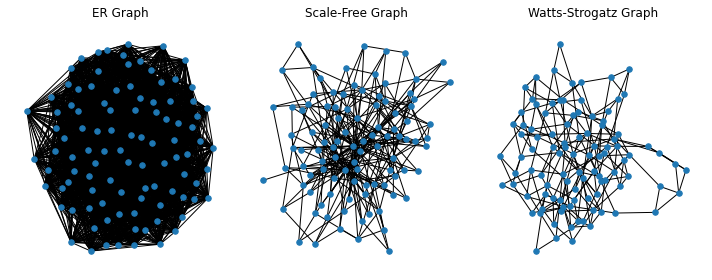

In [7]:
# Draw the graphs
plt.figure(figsize=(10, 4))

plt.subplot(131)
nx.draw(er_graph, with_labels=False, node_size=30)
plt.title("ER Graph")

plt.subplot(132)
nx.draw(sf_graph, with_labels=False, node_size=30)
plt.title("Scale-Free Graph")

plt.subplot(133)
nx.draw(ws_graph, with_labels=False, node_size=30)
plt.title("Watts-Strogatz Graph")

plt.tight_layout()
plt.show()

## Request 2

### Functions of request2

In [31]:
# functions that we need in request2
def caclulate_metrics(graph):    
    natural_connectivity = calculate_natural_connectivity(graph)
    energy, laplacian_energy = calculate_energy(graph)
    algebraic_connectivity = calculate_algebraic_connectivity(graph)
    spectral_gap = calculate_spectral_gap(graph)
    return natural_connectivity,energy, laplacian_energy,algebraic_connectivity,spectral_gap

def RSRBG(n1, n2, d1, d2):
    start_time = time.time()
    max_execution_time = 4  # Maximum execution time in seconds
    timeout = True

    while timeout:
        timeout = False
        G = nx.Graph()
        # Add nodes to group1
        group1_nodes = [f'G1-{i+1}' for i in range(n1)]
        G.add_nodes_from(group1_nodes, group='group1', value_degree=d1)
        
        # Add nodes to group2
        group2_nodes = [f'G2-{i+1}' for i in range(n2)]
        G.add_nodes_from(group2_nodes, group='group2', value_degree=d2)
        
        while any(G.nodes[node]['value_degree'] > 0 for node in G.nodes):
            # Choose one node from each group
            node1 = random.choice([node for node in G.nodes if G.nodes[node]['group'] == 'group1' and G.nodes[node]['value_degree'] > 0])
            node2 = random.choice([node for node in G.nodes if G.nodes[node]['group'] == 'group2' and G.nodes[node]['value_degree'] > 0])
            
            if node1 != node2 and not G.has_edge(node1, node2):
                # If there is no edge between the chosen nodes, add the edge
                G.add_edge(node1, node2)
                G.nodes[node1]['value_degree'] -= 1
                G.nodes[node2]['value_degree'] -= 1

            if time.time() - start_time > max_execution_time:
                print("Timeout!")
                start_time = time.time()  # Reset the start time to rerun the cell
                timeout = True
                break

        
    # Draw the graph
    pos = nx.spring_layout(G)
    colors = ['red' if G.nodes[node]['group'] == 'group1' else 'blue' for node in G.nodes]
    nx.draw_networkx_nodes(G, pos, node_color=colors)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    plt.show()
    return G


def generate_RSRBG_graph(d1, d2):
    n1 = d1
    n2 = d2
    graph = nx.Graph()

    graph.add_nodes_from(range(1, n1 + n2 + 1))
    available_nodes = set(range(1, n1 + n2 + 1))

    while available_nodes:
        node1 = np.random.choice(list(available_nodes))
        available_nodes.remove(node1)

        node2 = np.random.choice(list(available_nodes))
        available_nodes.remove(node2)

        graph.add_edge(node1, node2)

    return graph

def calculate_degree_distribution(graph):
    degrees = [graph.degree(node) for node in graph.nodes()]
    degree_counts = np.bincount(degrees)
    degree_distribution = degree_counts / np.sum(degree_counts)
    return degree_distribution

def calculate_eigenvalue_distribution(graph):
    eigenvalues = nx.linalg.spectrum.adjacency_spectrum(graph)
    eigenvalue_distribution = np.histogram(eigenvalues, bins=10, range=(min(eigenvalues), max(eigenvalues)))[0]
    return eigenvalue_distribution

def draw_distributions(graph):
    # Calculate degree distribution
    degree_distribution = calculate_degree_distribution(graph)

    # Calculate eigenvalue distribution
    eigenvalue_distribution = calculate_eigenvalue_distribution(graph)

    # Calculate other parameters and measures
    spectral_gap = max(eigenvalue_distribution) - eigenvalue_distribution[-2]
    algebraic_connectivity = min(eigenvalue_distribution[eigenvalue_distribution != 0])
    natural_connectivity = sum(np.abs(eigenvalue_distribution))
    symmetry_ratio = d1 / (d1 + d2)
    energy = np.sum(np.abs(eigenvalue_distribution))
    laplacian_energy = np.sum(np.square(eigenvalue_distribution))

    plt.subplot(121)
    plt.hist(degree_distribution, bins='auto',color='orange')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution Histogram')

    # Plot eigenvalue distribution
    plt.subplot(122)
    plt.plot(range(len(eigenvalue_distribution)), eigenvalue_distribution, 'bo-')
    plt.xlabel('Eigenvalue Bin')
    plt.ylabel('Density')
    plt.title('Eigenvalue Distribution')

    plt.tight_layout()
    plt.show()
    



### Run this cell for request2

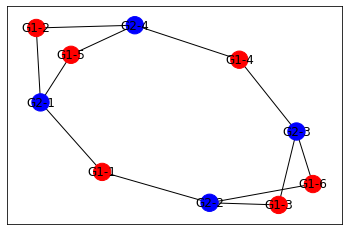

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)


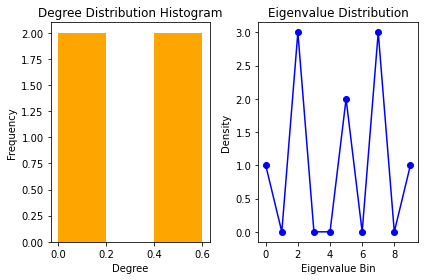

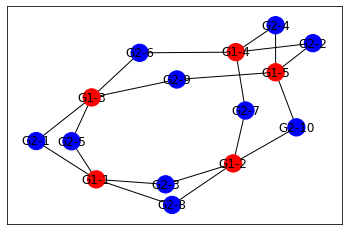

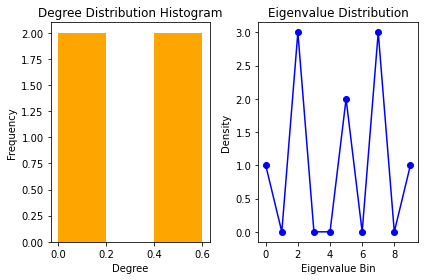

Timeout!


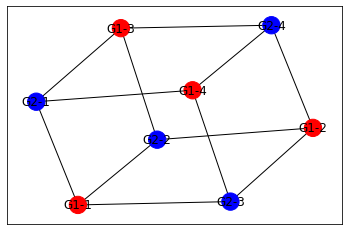

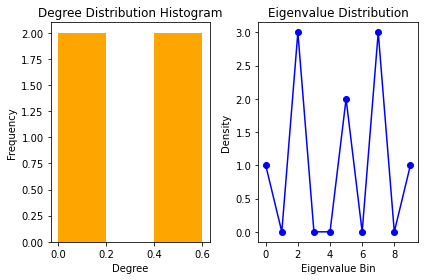

,nc,e,le,ac,sg
0,10.0,24.0,84.0,0.438447,0.449490+0.000000j
1,15.0,40.0,160.0,0.502788,0.540182+0.000000j
2,8.0,24.0,96.0,2.000000,2.000000+0.000000j


In [46]:
# create the graph multy times and store results in a dataframe
request2_df = pd.DataFrame(columns=['nc', 'e', 'le', 'ac', 'sg'])
inputs = [[6,4,2,3],[5,10,4,2],[4,4,3,3]]

for i in range(len(inputs)):
    n1,n2,d1,d2 = inputs[i]
    graph = RSRBG(n1,n2,d1,d2)
    metrics = caclulate_metrics(graph)
    request2_df = pd.concat([request2_df, pd.DataFrame([metrics], columns=request2_df.columns)], ignore_index=True)
    draw_distributions(graph)
request2_df

## Request 3

all graphs in one cell

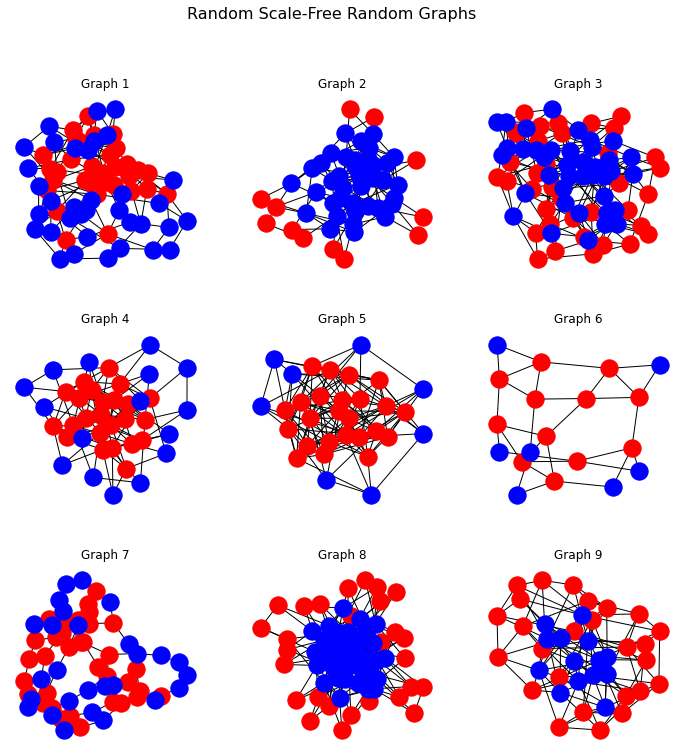

,graph_no,n1,n2,d1,d2,p,nc,e,le,ac,sg
0,1.0,33.0,35.0,5.0,3.0,0.233972,68.0,135.0,3.220369,0.021078,3.463565
1,2.0,12.0,39.0,2.0,6.0,0.997947,51.0,129.0,2.549804,0.047059,4.324706
2,3.0,36.0,39.0,4.0,6.0,0.673279,75.0,189.0,2.821982,0.042667,4.534054
3,4.0,24.0,16.0,7.0,3.0,0.610552,40.0,108.0,2.325641,0.135714,4.388462
4,5.0,24.0,8.0,10.0,5.0,0.685031,32.0,140.0,1.778226,0.270833,7.782258
5,6.0,12.0,7.0,4.0,2.0,0.658969,19.0,31.0,2.543860,0.315789,2.491228
6,7.0,34.0,27.0,3.0,2.0,0.540339,61.0,78.0,5.050820,0.000000,2.306557
7,8.0,28.0,38.0,3.0,10.0,0.956618,66.0,232.0,2.354779,0.151178,5.231702
8,9.0,26.0,14.0,5.0,8.0,0.758507,40.0,121.0,2.160256,0.131786,5.350000


In [19]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import time

def rsrg(n1, d1, n2, d2, p):
    G = nx.Graph()
    node_list = []
    
    # Add nodes with degree_value = d1
    for i in range(n1):
        node_list.append((i, {'degree_value': d1, 'group': 1}))
    
    # Add nodes with degree_value = d2
    for i in range(n1, n1 + n2):
        node_list.append((i, {'degree_value': d2, 'group': 2}))
    
    G.add_nodes_from(node_list)
    
    start_time = time.time()
    
    while any(node[1]['degree_value'] > 0 for node in G.nodes(data=True)):
        if time.time() - start_time > 1:
            raise TimeoutError("Timeout")
        
        # Choose two nodes randomly
        node1, node2 = random.sample(G.nodes(), 2)
        degree_value1 = G.nodes[node1]['degree_value']
        degree_value2 = G.nodes[node2]['degree_value']
        
        # Check if both nodes have degree_value > 0 and no edge exists between them
        if degree_value1 > 0 and degree_value2 > 0 and not G.has_edge(node1, node2):
            # Add edge with probability p
            if random.random() < p:
                G.add_edge(node1, node2)
                
                # Update degree_value for both nodes
                G.nodes[node1]['degree_value'] -= 1
                G.nodes[node2]['degree_value'] -= 1
    
    return G


def calculate_metrics(graph):
    nc = len(graph.nodes)
    e = len(graph.edges)
    ac = nx.average_clustering(graph)
    sg = nx.average_node_connectivity(graph)
    
    # Calculate average shortest path length if the graph is connected
    if nx.is_connected(graph):
        le = nx.average_shortest_path_length(graph)
    else:
        le = float("inf")  # Set a large value for disconnected graphs
    
    return nc, e, le, ac, sg



# Initialize the DataFrame
request2_df = pd.DataFrame(columns=['graph_no', 'n1', 'n2', 'd1', 'd2', 'p', 'nc', 'e', 'le', 'ac', 'sg'])

# Initialize the figure
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Random Scale-Free Random Graphs", fontsize=16)

# Generate 9 random graphs
generated_graphs = 0
num_attempts = 0

while generated_graphs < 9:
    if num_attempts > 150:
        print("Unable to generate 9 graphs within the time limit.")
        break
    
    n1 = random.randint(5, 40)
    n2 = random.randint(5, 40)
    d1 = random.randint(2, 10)
    d2 = random.randint(2, 10)
    p = random.uniform(0, 1)
    
    try:
        graph = rsrg(n1, d1, n2, d2, p)
        nc, e, le, ac, sg = calculate_metrics(graph)
        
        # Add the graph and metrics to the DataFrame
        request2_df.loc[generated_graphs] = [generated_graphs + 1, n1, n2, d1, d2, p, nc, e, le, ac, sg]

        
        # Draw the graph on the corresponding subplot
        row = generated_graphs // 3
        col = generated_graphs % 3
        ax = axes[row, col]
        
        # Set the graph layout
        pos = nx.spring_layout(graph, seed=42)
        
        # Draw nodes and edges
        nx.draw_networkx_nodes(graph, pos, node_color='r', nodelist=[n for n, d in graph.nodes(data=True) if d['group'] == 1], ax=ax)
        nx.draw_networkx_nodes(graph, pos, node_color='b', nodelist=[n for n, d in graph.nodes(data=True) if d['group'] == 2], ax=ax)
        nx.draw_networkx_edges(graph, pos, ax=ax)
        
        # Set the title
        ax.set_title(f"Graph {generated_graphs + 1}")
        ax.axis('off')
        
        generated_graphs += 1
    except TimeoutError:
        #print("Timeout")
        pass
    
    num_attempts += 1

# Hide empty subplots
for i in range(generated_graphs, 9):
    ax = axes[i // 3, i % 3]
    ax.axis("off")


# Show the plot
plt.show()

# Display the DataFrame
request2_df

each fraph with all needed

## Request 4

## Request 5

## Request 6

## Request 7

## Request 8

## Request 9

# GUI